# 배치 처리 (Batch Processing)
- 여러 입력을 한 번에 처리할 수 있습니다.

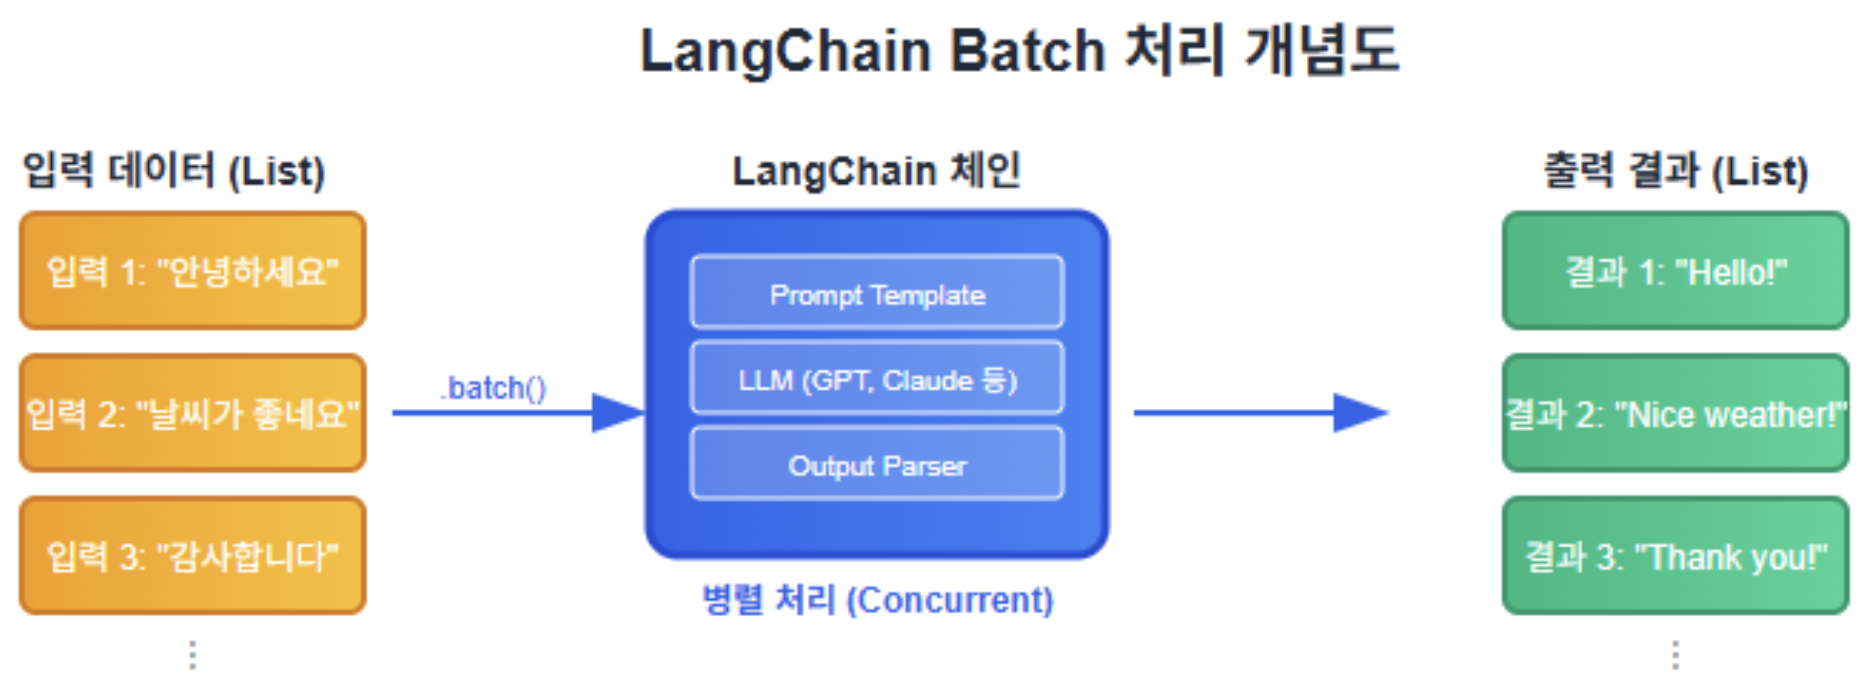

# Model

## [Groq API Key](https://console.groq.com/keys)

In [1]:
# 📦 필요한 라이브러리 import
import os
from dotenv import load_dotenv

# 환경변수 로드
load_dotenv()

True

In [2]:
# API 키 확인
api_key = os.getenv("GROQ_API_KEY")
if api_key:
    print("GROQ API 키가 설정되었습니다.")
else:
    print("GROQ API 키가 없습니다.")

GROQ API 키가 설정되었습니다.


## ChatGroq

In [3]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="llama-3.3-70b-versatile",
    temperature=1.2,
    top_p=0.95,
    max_tokens=2000
)

/Users/gyoungwon-cho/dev/github/Inflearn/langchain/4. LCEL/.venv/lib/python3.12/site-packages/pydantic/main.py:250: UserWarning: WARNING! top_p is not default parameter.
                    top_p was transferred to model_kwargs.
                    Please confirm that top_p is what you intended.
  validated_self = self.__pydantic_validator__.validate_python(data, self_instance=self)


# Parser

In [4]:
from langchain_core.output_parsers import StrOutputParser

# OutputParser 설정
output_parser = StrOutputParser()

# PromptTemplate

In [5]:
from langchain.prompts import PromptTemplate

# 번역 체인 생성
translation_prompt = PromptTemplate(
    input_variables=["text", "target_language"],
    template="다음 텍스트를 {target_language}로 번역해주세요: {text}"
)

# Chain

In [6]:
translation_chain = translation_prompt | llm | output_parser

## 배치 처리 실행

In [7]:
# 배치 입력 데이터
batch_inputs = [
    {"text": "안녕하세요", "target_language": "영어"},
    {"text": "감사합니다", "target_language": "일본어"},
    {"text": "좋은 하루 되세요", "target_language": "중국어"},
    {"text": "만나서 반갑습니다", "target_language": "스페인어"}
]

In [8]:
# 배치 처리 실행
batch_results = translation_chain.batch(batch_inputs)

for i, (input_data, result) in enumerate(zip(batch_inputs, batch_results)):
    print(f"{i+1}. 원문: '{input_data['text']}' → {input_data['target_language']}: '{result}'")


1. 원문: '안녕하세요' → 영어: 'Hello'
2. 원문: '감사합니다' → 일본어: 'arigatou gozaimasu (감사합니다)'
3. 원문: '좋은 하루 되세요' → 중국어: '好的, 一天愉快！（하오 드 뤼허 훠톈）'
4. 원문: '만나서 반갑습니다' → 스페인어: 'Encantado de conocerte'
